In [1]:
import sys
import logging
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


tf.logging.set_verbosity(logging.ERROR)

# Add repository's source files on python inclusion path.
sys.path.insert(0, '../src')


### Dataset definition

In [2]:
from predictive_model import ArrayDataSet

In [3]:
clusters = [([-1, -1], 0), ([1, -1], 0), ([-1, 1], 0), ([1, 1], 1)]
points_per_cluster = 100
noisy_inputs = []
labels = []
for cluster_mean, cluster_label in clusters:
    for _ in range(points_per_cluster):
        noisy_inputs.append(cluster_mean + np.random.multivariate_normal([0., 0.], [[0.1, 0.], [0., 0.1]]))
        labels.append(cluster_label)

In [4]:
dataset = ArrayDataSet(inputs=noisy_inputs, labels=labels, test_proportion=0.3)

#### Distribution of classes in the dataset

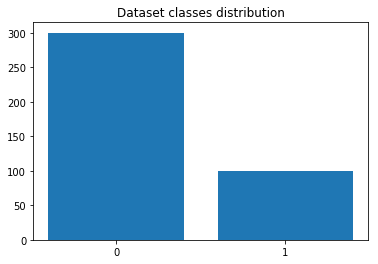

,num_samples
class,
0,300
1,100


In [5]:
classes_distribution, ax =  dataset.classes_distribution()
classes_distribution

num_samples      
dataset        Test Train
class                    
0                93   207
1                27    73

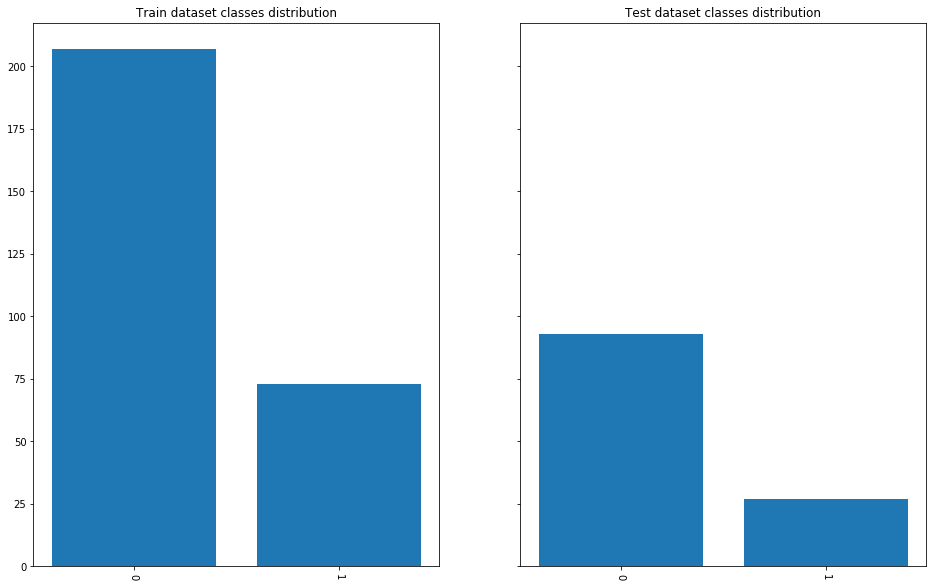

In [6]:
dataset.train_test_classes_distribution()

### Model definition

In [7]:
from predictive_model import LinearNN, SoftmaxActivation, DeepPredictiveModel, plot_hyperplanes

In [8]:
model = DeepPredictiveModel(inner_models=[LinearNN], num_units=dataset.num_classes, 
                            num_features=[dataset.num_features], num_classes=dataset.num_classes)

### Model training

In [9]:
parameters_before_training = model.parameters

In [10]:
model.train(dataset, num_epochs=10, batch_size=20, validation_size=0.5)

INFO:root:
Training.
Epoch: 0 .
Learning rate: 1.0 .
INFO:root:Completion: 0%
INFO:root:Completion: 14%
INFO:root:Completion: 28%
INFO:root:Completion: 42%
INFO:root:Completion: 57%
INFO:root:Completion: 71%
INFO:root:Completion: 85%
INFO:root:Avg. Loss: 0.4225771427154541
INFO:root:
Validation.
Epoch: 0 .
INFO:root:Completion: 0%
INFO:root:Completion: 14%
INFO:root:Completion: 28%
INFO:root:Completion: 42%
INFO:root:Completion: 57%
INFO:root:Completion: 71%
INFO:root:Completion: 85%
INFO:root:Avg. Loss: 0.21629594266414642
INFO:root:
Training.
Epoch: 1 .
Learning rate: 1.0 .
INFO:root:Completion: 0%
INFO:root:Completion: 14%
INFO:root:Completion: 28%
INFO:root:Completion: 42%
INFO:root:Completion: 57%
INFO:root:Completion: 71%
INFO:root:Completion: 85%
INFO:root:Avg. Loss: 0.18418219685554504
INFO:root:
Validation.
Epoch: 1 .
INFO:root:Completion: 0%
INFO:root:Completion: 14%
INFO:root:Completion: 28%
INFO:root:Completion: 42%
INFO:root:Completion: 57%
INFO:root:Completion: 71%
INFO:r

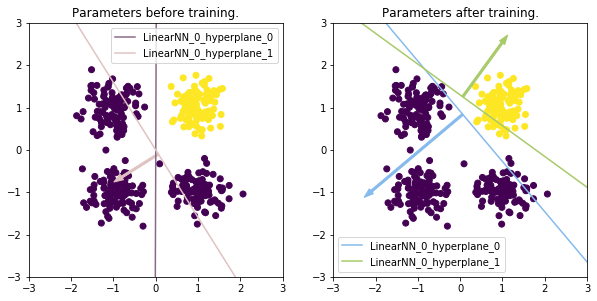

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(10, 10))
axes[0].scatter(np.array(dataset.inputs)[:, 0], np.array(dataset.inputs)[:, 1], c=dataset.labels)
axes[1].scatter(np.array(dataset.inputs)[:, 0], np.array(dataset.inputs)[:, 1], c=dataset.labels)
plot_hyperplanes(parameters_before_training, ax=axes[0])
plot_hyperplanes(model.parameters, ax=axes[1])
axes[0].set_title('Parameters before training.')
axes[1].set_title('Parameters after training.')
plt.show()

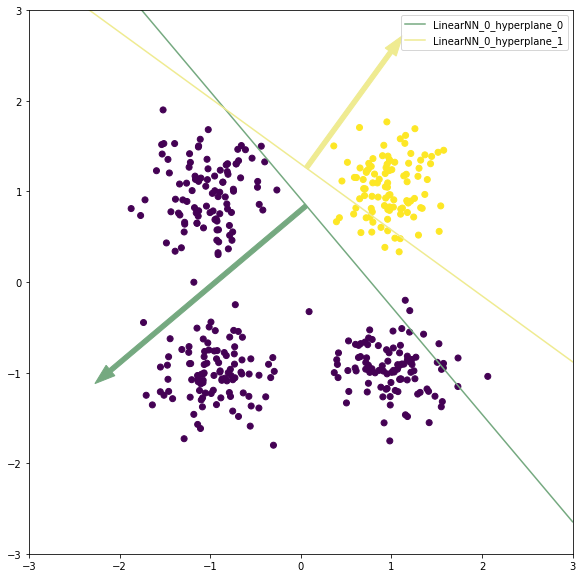

In [16]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(np.array(dataset.inputs)[:, 0], np.array(dataset.inputs)[:, 1], c=dataset.labels)
plot_hyperplanes(model.parameters, ax=ax)